Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_25 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_12 (Dropout)        (None, 16, 16, 32)        0         
                                                                 
 conv2d_26 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_27 (Conv2D)          (None, 16, 16, 64)        36928     
                                                      

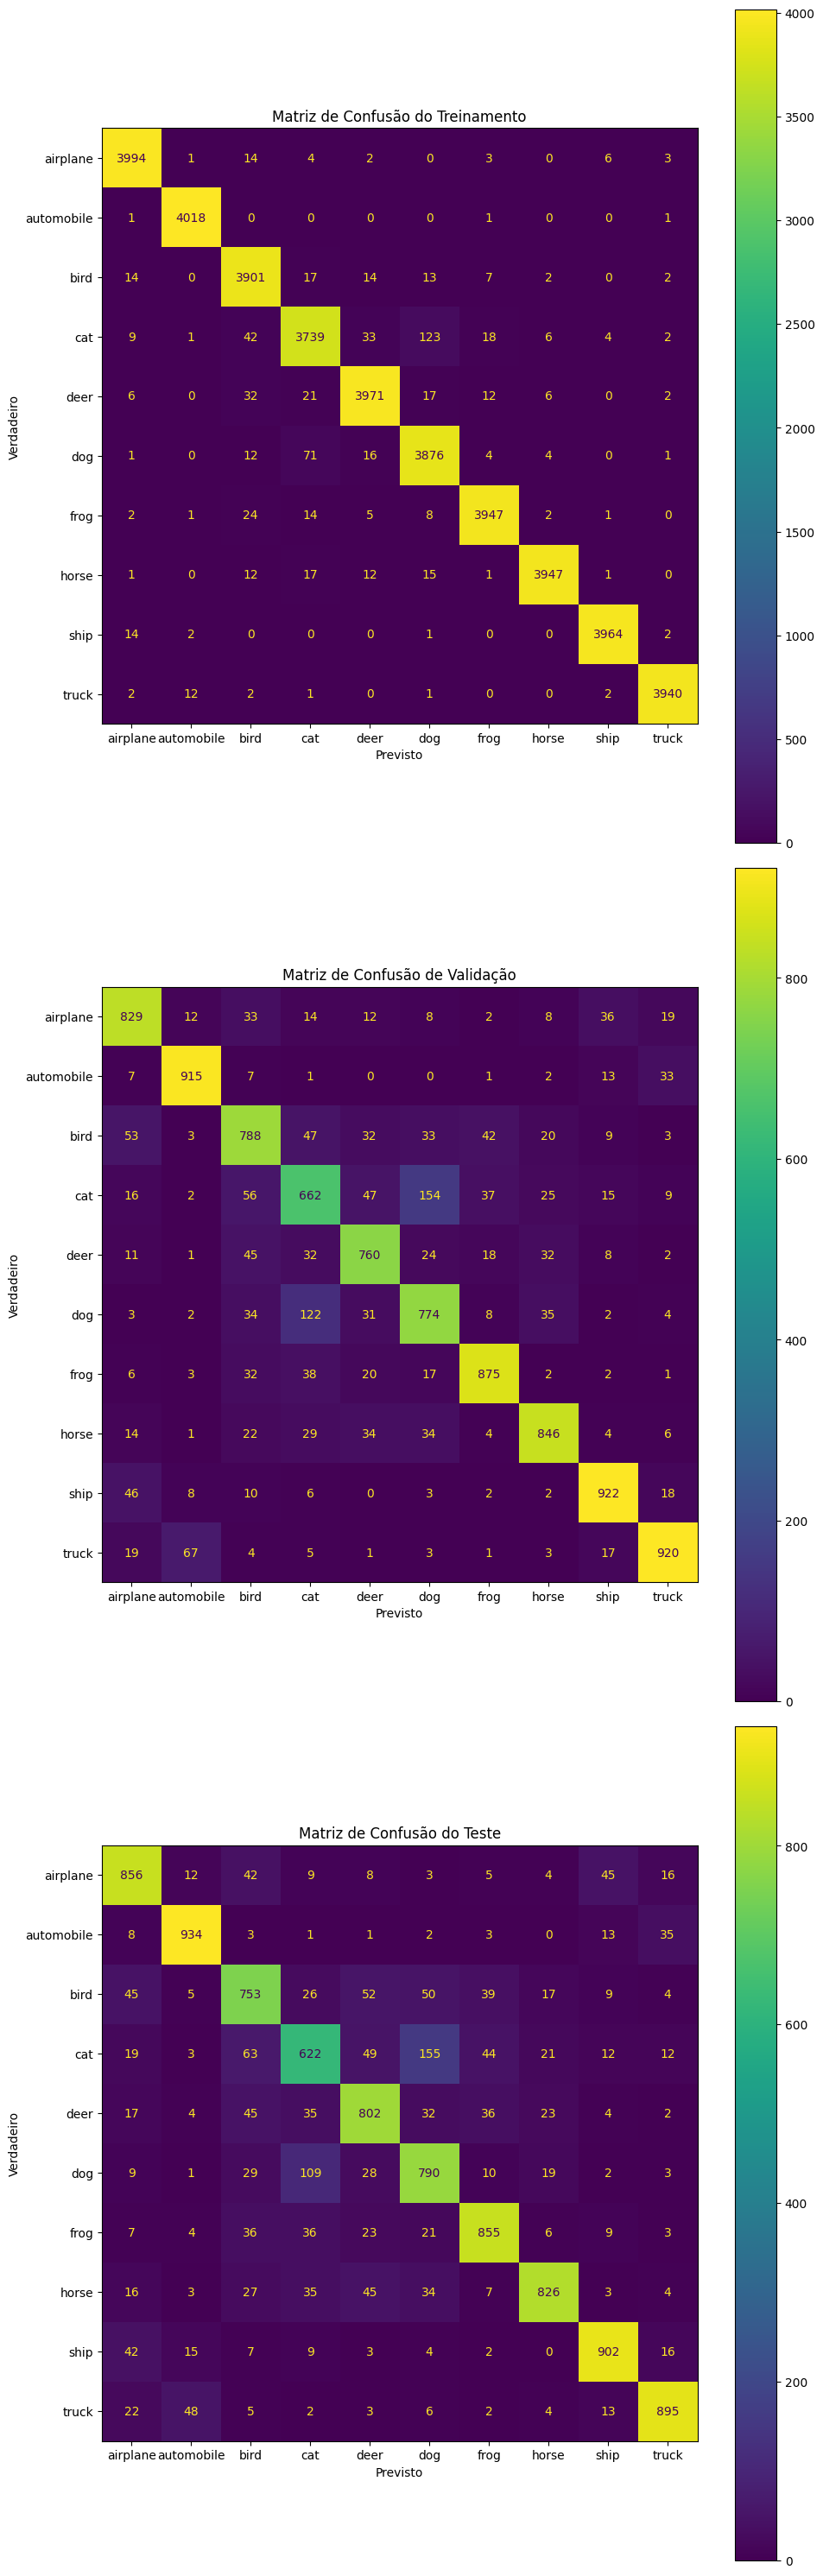

Treinamento:
              precision    recall  f1-score   support

    airplane       0.99      0.99      0.99      4027
  automobile       1.00      1.00      1.00      4021
        bird       0.97      0.98      0.97      3970
         cat       0.96      0.94      0.95      3977
        deer       0.98      0.98      0.98      4067
         dog       0.96      0.97      0.96      3985
        frog       0.99      0.99      0.99      4004
       horse       0.99      0.99      0.99      4006
        ship       1.00      1.00      1.00      3983
       truck       1.00      0.99      1.00      3960

    accuracy                           0.98     40000
   macro avg       0.98      0.98      0.98     40000
weighted avg       0.98      0.98      0.98     40000

Validação:
              precision    recall  f1-score   support

    airplane       0.83      0.85      0.84       973
  automobile       0.90      0.93      0.92       979
        bird       0.76      0.77      0.76      1030


In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dropout, Dense, Flatten, Conv2D, MaxPooling2D, GlobalAveragePooling2D
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt


# lista com os nomes dessas classes.
class_images2 = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                 'dog', 'frog', 'horse', 'ship', 'truck']


# carregar banco de dados
cifar10 = tf.keras.datasets.cifar10


(x_train, y_train), (x_test, y_test) = cifar10.load_data()


x_train, x_test = x_train / 255.0, x_test / 255.0


# Dividindo os conjuntos de dados
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.20, random_state=42)


# Convertendo os rótulos para one-hot
y_train_one_hot = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_valid_one_hot = tf.keras.utils.to_categorical(y_valid, num_classes=10)
y_test_one_hot = tf.keras.utils.to_categorical(y_test, num_classes=10)

# Definindo o modelo
model = Sequential()

# Adicionando camadas convolucionais
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.10))


model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.10))


model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.10))

''' model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.10)) '''

''' model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.15)) '''

model.summary()

model.add(GlobalAveragePooling2D())


model.add(Dense(10, activation='softmax'))


# Compilando o modelo
model.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['accuracy'])


# Definindo o callback EarlyStopping
callback = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


# Treinando o modelo com o callback EarlyStopping
history = model.fit(x_train, y_train_one_hot , epochs=50, batch_size=64, validation_split=0.1, callbacks=[callback], verbose=2)

model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train_one_hot, epochs=5)

model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train_one_hot, epochs=5)

# Avaliando o modelo no conjunto de teste
test_loss, test_acc = model.evaluate(x_test, y_test_one_hot, verbose=2)
print('\nTest loss:', test_loss)
print('\nTest accuracy:', test_acc)


import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay


# Fazendo previsões nos conjuntos de treinamento, validação e teste
y_pred_train = np.argmax(model.predict(x_train), axis=-1)
y_pred_valid = np.argmax(model.predict(x_valid), axis=-1)
y_pred_test = np.argmax(model.predict(x_test), axis=-1)


# Calculando as matrizes de confusão
cm_train = confusion_matrix(y_train, y_pred_train)
cm_valid = confusion_matrix(y_valid, y_pred_valid)
cm_test = confusion_matrix(y_test, y_pred_test)


# Plotando as matrizes de confusão
fig, ax = plt.subplots(3,1, figsize=(10, 30))


ConfusionMatrixDisplay(cm_train, display_labels=class_images2).plot(ax=ax[0])
ax[0].set_title('Matriz de Confusão do Treinamento')
ax[0].set_xlabel('Previsto')
ax[0].set_ylabel('Verdadeiro')


ConfusionMatrixDisplay(cm_valid, display_labels=class_images2).plot(ax=ax[1])
ax[1].set_title('Matriz de Confusão de Validação')
ax[1].set_xlabel('Previsto')
ax[1].set_ylabel('Verdadeiro')


ConfusionMatrixDisplay(cm_test, display_labels=class_images2).plot(ax=ax[2])
ax[2].set_title('Matriz de Confusão do Teste')
ax[2].set_xlabel('Previsto')
ax[2].set_ylabel('Verdadeiro')


plt.tight_layout()
plt.show()


# Imprimindo os valores de recall e f1-score para cada conjunto
print("Treinamento:")
print(classification_report(y_train, y_pred_train, target_names=class_images2))


print("Validação:")
print(classification_report(y_valid, y_pred_valid, target_names=class_images2))


print("Teste:")
print(classification_report(y_test, y_pred_test, target_names=class_images2))


# Calculando a entropia cruzada no conjunto de teste
predictions = model.predict(x_test)
# Calculando a entropia cruzada no conjunto de teste
cross_entropy = tf.keras.losses.categorical_crossentropy(y_test_one_hot, predictions).numpy().mean()
print('\nCross-Entropy:', cross_entropy)

